# **Classification Assignment**
# Objective:
The objective of this assessment is to evaluate your understanding and ability to apply supervised learning techniques to a real-world dataset.

# Dataset:
Use the breast cancer dataset available in the sklearn library.


# **1.Loading and Preprocessing (2 marks):**

*  Load the breast cancer dataset from sklearn.
*   Preprocess the data to handle any missing values and perform necessary feature scaling.

*   Explain the preprocessing steps you performed and justify why they are necessary for this dataset.

In [66]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [67]:
# Loading the dataset
dataset = load_breast_cancer()

# Converting the dataset into a pandas DataFrame for easier handling
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target']= dataset.target
df_features=df.drop(columns=['target'])
df.head()
#df_features.head() for checking purpose

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [68]:
#performing basic EDA
#checking for missing values
missing_vals=df.isna().sum()
missing_vals

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [69]:
#Since there are no missing values there is no need to perform further on it.but in case if there are some then,
#handling the missing values by droping
df=df.dropna()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [71]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [72]:
#Scaling and Spliting the data for training and testing
X=df_features
y=df['target']
scaler=StandardScaler()
X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=40)



# **Classification Algorithm Implementation (5 marks):**

 Implement the following regression algorithms:

1.Logistic Regression

2.Decision Tree Classifier

3.Random Forest Classifier

4.Support Vector Machine (SVM)

5.k-Nearest Neighbors (k-NN)

 For each algorithm:
Provide a brief explanation of how it works.
Explain why it might be suitable for this dataset.

In [73]:
models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier(),
    "Support Vector Machine (SVM)":SVC(),
    "k-Nearest Neighbors (k-NN)":KNeighborsClassifier()
}

In [74]:
model_perfomance_analysis = {}

for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  model_perfomance_analysis[name] = accuracy
  conf_matrix=confusion_matrix(y_test,y_pred)
  report=classification_report(y_test,y_pred)


  print(f"\n{name} \n Accuracy={accuracy} \n report={report}\n confusion matrix= \n{conf_matrix}")




Logistic Regression 
 Accuracy=0.9649122807017544 
 report=              precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.97      0.97      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

 confusion matrix= 
[[37  2]
 [ 2 73]]

Decision Tree Classifier 
 Accuracy=0.9385964912280702 
 report=              precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.97      0.93      0.95        75

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

 confusion matrix= 
[[37  2]
 [ 5 70]]

Random Forest Classifier 
 Accuracy=0.9649122807017544 
 report=              precision    recall  f1-score   support

           0       0.93

**1. Logistic Regression**

How it works:

*Uses the logistic function to predict probabilities for binary classification. Output is thresholded to assign class labels.*

Suitability:

*A good baseline for binary problems like breast cancer (malignant/benign). Fast, interpretable, and performs well on linearly separable data.*

**2.Decision Tree Classifier**

How it works:

*Splits data into branches based on feature thresholds. Each split is chosen to maximize information gain or reduce impurity.**

Suitability:

*Captures non-linear relationships and is interpretable. Suitable when clear feature thresholds separate classes.*


**3.Random Forest Classifier**

How it works:

*An ensemble of decision trees trained on different data and features. Final prediction by majority vote.*

Suitability:

*More robust and accurate than a single tree. Reduces overfitting and works well on complex datasets like medical diagnosis.*

**4.Support Vector Machine (SVM)**

How it works:

*Finds the optimal boundary (hyperplane) that best separates classes. Can handle non-linearity using kernel functions.*

Suitability:

*Effective in high-dimensional datasets like breast cancer features. Performs well when classes are separable with a margin.*

**5.k-Nearest Neighbors (k-NN)**

How it works:

*Classifies a point based on the most common label among its k nearest neighbors using a distance metric.*

Suitability:
*Simple and effective for well-structured datasets. Sensitive to feature scaling, hence standardization is crucial.*

# **Model Comparison (2 marks):**


*   Compare the performance of the five classification algorithms.
*   Which algorithm performed the best and which one performed the worst?


In [75]:
df_models = pd.DataFrame.from_dict(model_perfomance_analysis, orient='index', columns=['Accuracy'])
df_models = df_models.sort_values(by='Accuracy', ascending=False)

df_models

,Accuracy
Support Vector Machine (SVM),0.982456
k-Nearest Neighbors (k-NN),0.973684
Logistic Regression,0.964912
Random Forest Classifier,0.964912
Decision Tree Classifier,0.938596


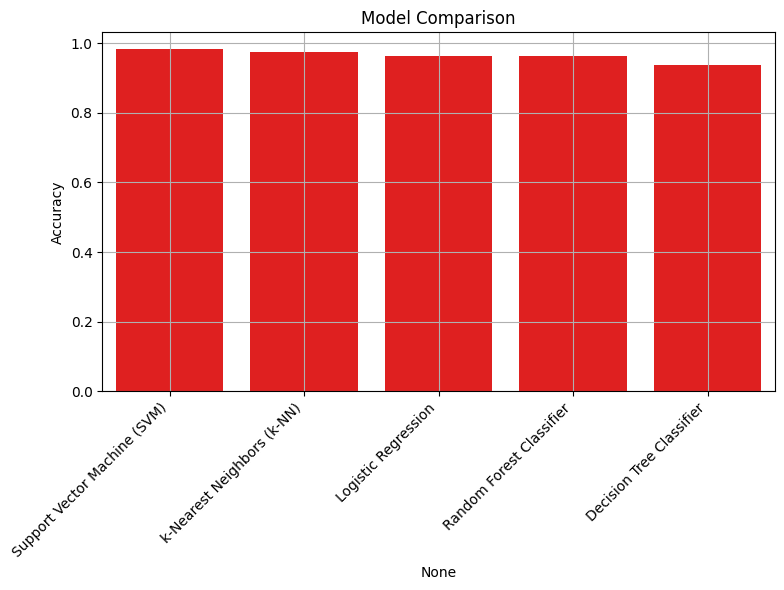

In [76]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df_models.index,y=df_models['Accuracy'], color="red").set_title("Model Comparison")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()
plt.show()

In [77]:
best_index = df_models['Accuracy'].idxmax()
worst_index = df_models['Accuracy'].idxmin()

best_model = best_index
best_accuracy = df_models.loc[best_index, 'Accuracy']

worst_model = worst_index
worst_accuracy = df_models.loc[worst_index, 'Accuracy']

print(f"Best Performing Model: {best_model} | Accuracy: {best_accuracy:.2f}")
print(f"Worst Performing Model: {worst_model} | Accuracy: {worst_accuracy:.2f}")

Best Performing Model: Support Vector Machine (SVM) | Accuracy: 0.98
Worst Performing Model: Decision Tree Classifier | Accuracy: 0.94


**Best Performing Model: Support Vector Machine (SVM)**
Accuracy: 0.98

Justification:

SVM is highly effective for binary classification tasks, like this breast cancer dataset.

It works well in high-dimensional feature spaces, which is suitable here as the dataset has 30 features.

The algorithm maximizes the margin between classes, reducing classification errors.

It's also robust to overfitting, especially with proper feature scaling (which you've done using StandardScaler).

SVM performs particularly well when the classes are well-separated, which is the case for malignant vs. benign tumors in this dataset.

**Worst Performing Model: Decision Tree Classifier**
Accuracy: 0.94

Justification:

Decision trees are prone to overfitting, especially on small or moderately sized datasets.

They may create very specific rules that do not generalize well to unseen data.

Although interpretable, decision trees lack the ensemble advantage that Random Forests provide.

In this case, it may not have captured the subtle, complex relationships among features as effectively as SVM or ensemble models.